<a href="https://colab.research.google.com/github/wagner-alves-AI/PLN/blob/master/ProjetoPLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importa bibliotecas necessárias para o WEB-SCRAPING e para salvar dados
import requests
from bs4 import BeautifulSoup
import pickle

# Obtém letra do site https://www.letras.mus.br/ através do link recebido
# OBS: Esta função deve ser adaptada caso queira obter dados de outro site, pois a estrutura HTML de cada site é diferente
def obtem_letra(link):
   
  page = requests.get(link).text # Obtém HTML da página 
  soup = BeautifulSoup(page, "lxml") # Interpreta como XML

  letra = ""
  # Obtém textos contidos em parágrafos dentro do conteiner da letra completa
  for p in soup.find(class_="cnt-letra").find_all('p'):
    letra += " " + p.get_text(" ") # Concatena textos e substitui <br> por um espaço
  
  return letra

# Dicionário com os links das músicas de cada gênero
links = {
          'sertanejo':[
            'https://www.letras.mus.br/henrique-e-juliano/liberdade-provisoria/',
            'https://www.letras.mus.br/marilia-mendonca/graveto/',
            'https://www.letras.mus.br/gustavo-mioto/com-ou-sem-mim/',
            'https://www.letras.mus.br/henrique-e-juliano/conheco-meu-gado/',
            'https://www.letras.mus.br/henrique-e-juliano/nao-gosto-eu-amo/',
            'https://www.letras.mus.br/marilia-mendonca/supera/',
            'https://www.letras.mus.br/luan-santana/agua-com-acucar/',
            'https://www.letras.mus.br/henrique-e-juliano/volta-por-baixo/',
            'https://www.letras.mus.br/luiza-e-maurilio/s-de-saudade-part-ze-neto-e-cristiano/',
            'https://www.letras.mus.br/marilia-mendonca/intencao-part-gaab/',
            'https://www.letras.mus.br/ze-neto-cristiano/bebi-minha-bicicleta/',
            'https://www.letras.mus.br/henrique-e-juliano/briga-feia/',
            'https://www.letras.mus.br/marilia-mendonca/todo-mundo-vai-sofrer/',
            'https://www.letras.mus.br/gusttavo-lima/milu/',
            'https://www.letras.mus.br/jorge-mateus/cheirosa/'
          ],
         
         'pagode':[
            'https://www.letras.mus.br/ferrugem/ate-que-enfim/',
            'https://www.letras.mus.br/thiaguinho/deixa-tudo-como-ta/',
            'https://www.letras.mus.br/dilsinho/pessimo-negocio/',
            'https://www.letras.mus.br/pixote/nem-de-graca/',
            'https://www.letras.mus.br/zeca-pagodinho/o-sol-nascera-a-sorrir/',
            'https://www.letras.mus.br/ferrugem/sinto-a-sua-falta/',
            'https://www.letras.mus.br/ferrugem/ta-na-cara/',
            'https://www.letras.mus.br/raca-negra/73083/',
            'https://www.letras.mus.br/pericles/ate-que-durou/',
            'https://www.letras.mus.br/dilsinho/onze-e-pouquinho/',
            'https://www.letras.mus.br/dilsinho/refem/',
            'https://www.letras.mus.br/ferrugem/pra-voce-acreditar/',
            'https://www.letras.mus.br/pericles/melhor-eu-ir/',
            'https://www.letras.mus.br/sorriso-maroto/50-vezes/',
            'https://www.letras.mus.br/dilsinho/pouco-a-pouco/'       
         ],

         'funk':[
            'https://www.letras.mus.br/thiaguinho-mt/tudo-ok-part-mila-e-js-o-mao-de-ouro/',
            'https://www.letras.mus.br/mc-du-black/gaiola-e-o-troco/',
            'https://www.letras.mus.br/mc-lele-jp/sou-vitorioso-part-neguinho-do-kaxeta/',
            'https://www.letras.mus.br/mc-poze/to-voando-alto/',
            'https://www.letras.mus.br/mc-ingryd/vem-me-satisfazer/',
            'https://www.letras.mus.br/dada-boladao/surtada/',
            'https://www.letras.mus.br/pedro-sampaio/sentadao-part-felipe-original-e-js-o-mao-de-ouro/',
            'https://www.letras.mus.br/ludmilla/invocada-part-leo-santana/',
            'https://www.letras.mus.br/mc-poze/puxando-lanca-no-barco-cheio-de-piranha-part-mc-kevin-o-chris/',
            'https://www.letras.mus.br/thiaguinho-mt/tudo-ok-remix-part-mila-marcia-fellipe-henry-freitas-e-js-mao-de-ouro/',
            'https://www.letras.mus.br/ludmilla/verdinha-part-walshy-fire-e-topo-la-maskara/',
            'https://www.letras.mus.br/lexa/chama-ela-part-pedro-sampaio/',
            'https://www.letras.mus.br/mc-kevin/8a-cypher-4m-part-mc-magal-mc-hariel-mc-kelvinho-mc-neguinho-do-kaxeta-mc-bo-mc-ph-e-mc-ig/',
            'https://www.letras.mus.br/mc-henny/virgem-part-mc-lya/',
            'https://www.letras.mus.br/mc-cabelinho/era-uma-vez/'
         ],

         'pop':[
            'https://www.letras.mus.br/iza/brisa/',
            'https://www.letras.mus.br/iza/meu-talisma/',
            'https://www.letras.mus.br/iza/dona-de-mim/',
            'https://www.letras.mus.br/iza/pesadao/',
            'https://www.letras.mus.br/pabllo-vittar/amor-de-que/',
            'https://www.letras.mus.br/melim/gelo/',
            'https://www.letras.mus.br/melim/meu-abrigo/',
            'https://www.letras.mus.br/melim/dois-coracoes/',
            'https://www.letras.mus.br/melim/ouvi-dizer/',
            'https://www.letras.mus.br/anitta/cobertor/',
            'https://www.letras.mus.br/vitao/um-pouco-de-voce/',
            'https://www.letras.mus.br/vitao/romeu-e-julieta/',
            'https://www.letras.mus.br/vitao/maturidade-part-day/',
            'https://www.letras.mus.br/vitao/tratamento-perfeito-part-hodari/',
            'https://www.letras.mus.br/tiago-iorc/pode-se-achegar-part-agnes-nunes/',
         ],

         'rap':[
            'https://www.letras.mus.br/matue/kenny-g/',
            'https://www.letras.mus.br/mc-orochi/amor-de-fim-de-noite/',
            'https://www.letras.mus.br/l7nnon/barcelona-part-pk-e-mun-ra/',
            'https://www.letras.mus.br/pineapple/poetas-no-topo-33/',
            'https://www.letras.mus.br/pineapple/amor-e-samba-poesia-acustica-8/',
            'https://www.letras.mus.br/pineapple/era-uma-vez-poesia-acustica-6/',
            'https://www.letras.mus.br/racionais-mcs/64916/',
            'https://www.letras.mus.br/tribo-da-periferia/pianista-da-rua-6/',
            'https://www.letras.mus.br/1kilo/deixe-me-ir/',
            'https://www.letras.mus.br/tribo-da-periferia/conspiracao-part-marilia-mendonca/',
            'https://www.letras.mus.br/racionais-mcs/64917/',
            'https://www.letras.mus.br/racionais-mcs/64919/',
            'https://www.letras.mus.br/tribo-da-periferia/nosso-plano/',
            'https://www.letras.mus.br/baco-exu-do-blues/me-desculpa-jay-z-part-1lum3/',
            'https://www.letras.mus.br/projota/muleque-de-vila/'
         ]
}

In [17]:
letras_por_musica = []
letras_por_artista = {}
# Faz as requisições ao site para buscar as letras (pode demorar alguns minutos para executar)
for genero in links.keys(): # Percorre gêneros
  print(genero)
  
  for link in links[genero]: # Percorre links do gênero
    print(link)
    letra = obtem_letra(link) #Obtém letra para o link atual
    letras_por_musica.append( letra ) # Adiciona letra na lista de músicas

    artista = link.split("/")[3] # Obtém nome do artista pelo link
    if artista in letras_por_artista:
      letras_por_artista[artista] += letra + "\n"
    else:
      letras_por_artista[artista] = letra


# Cria uma música para cada gênero (resultado da concatenação de todas músicas)
letras_por_genero = {
                      'sertanejo': " ".join(letras_por_musica[0:15]),
                      'pagode': " ".join(letras_por_musica[15:30]),
                      'funk': " ".join(letras_por_musica[30:45]),
                      'pop': " ".join(letras_por_musica[45:60]),
                      'rap': " ".join(letras_por_musica[60:75]),
                    }


sertanejo
https://www.letras.mus.br/henrique-e-juliano/liberdade-provisoria/
https://www.letras.mus.br/marilia-mendonca/graveto/
https://www.letras.mus.br/gustavo-mioto/com-ou-sem-mim/
https://www.letras.mus.br/henrique-e-juliano/conheco-meu-gado/
https://www.letras.mus.br/henrique-e-juliano/nao-gosto-eu-amo/
https://www.letras.mus.br/marilia-mendonca/supera/
https://www.letras.mus.br/luan-santana/agua-com-acucar/
https://www.letras.mus.br/henrique-e-juliano/volta-por-baixo/
https://www.letras.mus.br/luiza-e-maurilio/s-de-saudade-part-ze-neto-e-cristiano/
https://www.letras.mus.br/marilia-mendonca/intencao-part-gaab/
https://www.letras.mus.br/ze-neto-cristiano/bebi-minha-bicicleta/
https://www.letras.mus.br/henrique-e-juliano/briga-feia/
https://www.letras.mus.br/marilia-mendonca/todo-mundo-vai-sofrer/
https://www.letras.mus.br/gusttavo-lima/milu/
https://www.letras.mus.br/jorge-mateus/cheirosa/
pagode
https://www.letras.mus.br/ferrugem/ate-que-enfim/
https://www.letras.mus.br/thiaguin

In [18]:
pickle.dump( letras_por_musica, open( "letras_por_musica.pickle", "wb" ) )
pickle.dump( letras_por_genero, open( "letras_por_genero.pickle", "wb" ) )
pickle.dump( letras_por_artista, open( "letras_por_artista.pickle", "wb" ) )

In [19]:
letras_por_genero

{'funk': " É hoje que ele paga todo o mal que ele te fez É hoje que ele paga todo o mal que ele te fez Cabelo ok, marquinha ok, sobrancelha ok, a unha tá ok Brota no bailão, pro desespero do seu ex Brota no bailão, pro desespero do seu ex É hoje que ele paga todo o mal que ele te fez É hoje que ele paga todo o mal que ele te fez Cabelo ok, sobrancelha ok, maquiagem ok, a unha tá ok Brota no bailão, pro desespero do seu ex Brota no bailão, pro desespero do seu ex Brota-brota no bailão pro desespero do seu ex Brota-brota no bailão pro desespero do seu ex Se ele te trombar, vai se arrepender Uma bebê dessas, nunca mais ele vai ter Uma-uma bebê dessas, nunca mais ele vai ter Uma-uma bebê dessas, nunca mais ele vai ter Vai ter, uma bê-bê-bê, vai ter Uma-uma bebê dessas, nunca mais ele vai ter Uma bebê dessas, nunca mais ele vai ter Uma-uma-uma bebê dessas, nunca mais ele vai ter Uma-uma bebê dessas, nunca mais ele vai ter  Gaiola é o troco Du Black na voz, na voz, na voz, na voz Se teu ex n

In [20]:
import pandas as pd
pd.set_option('max_colwidth',150)

# Cria DataFrame para gêneros
genero_df = pd.DataFrame([letras_por_genero]).transpose()
genero_df.columns = ['letras']
genero_df

,letras
sertanejo,No início foi assim Terminou tá terminado Cada um pro seu lado Não precisa ligar mais Só que foi eu quem terminou E quem foi largado não espera E...
pagode,"Quem mandou você roubar o brilho do Sol E guardar dentro do olhar? Ah, esse cabelo em forma de caracol Que eu quero me embaraçar De hoje em diant..."
funk,"É hoje que ele paga todo o mal que ele te fez É hoje que ele paga todo o mal que ele te fez Cabelo ok, marquinha ok, sobrancelha ok, a unha tá ok..."
pop,"Sente a vibração, que o som chegou Bota o pé na areia e deixa a onda entrar Tá geral na pilha, então, demorou Vem que é da boa e tu vai gostar Eu..."
rap,"Quer viver a minha vida? Faz cem mil sem esforço Ahn, se eu quiser ela deixa eu pôr no osso Se meu som é uma droga, geral quer sentir o gosto Tod..."


In [21]:
# Cria DataFrame para artistas
#pd.set_option('display.max_colwidth', -1)
artista_df = pd.DataFrame([letras_por_artista]).transpose()
artista_df.columns = ['letras']
artista_df = artista_df.sort_index()
artista_df

,letras
1kilo,"[Baviera] Menina, me dá sua mão, pense bem antes de agir Se não for agora, te espero lá fora, então deixe-me ir Um dia te encontro nessas suas vo..."
anitta,Eu sei que o tempo pode afastar a gente Mas se o tempo afastar a gente É porque o nosso amor é fraco demais E amores fracos não merecem o meu tem...
baco-exu-do-blues,"Eu não gosto de você, não quero mais te ver Por favor, não me ligue mais Eu amo tanto você, sorrio ao te ver Não me esqueça jamais Eu não gosto d..."
dada-boladao,"JS, Tati Zaqui Dadá Boladão, baby Safada Como é que tem coragem de falar na minha cara Que só faz comigo o que tu fez lá em casa? Hmm Tava lembra..."
dilsinho,"Precisei de mil frases certas pra te conquistar E de uma só errada, pra te perder Eu levei tanto tempo pra te apaixonar Em um minuto só, perdi vo..."
ferrugem,"Quem mandou você roubar o brilho do Sol E guardar dentro do olhar? Ah, esse cabelo em forma de caracol Que eu quero me embaraçar De hoje em diant..."
gustavo-mioto,"Se você não me disser a verdade Não tem como eu ajudar, minha metade Se tem outro em meu lugar Se você quer colocar Te deixo livre pra viver Não ..."
gusttavo-lima,"Quem cai uma vez, vai cair três Só que eu tô caindo pela décima vez E quando eu decido que vou te esquecer Cê fala que me ama só pra me prender S..."
henrique-e-juliano,No início foi assim Terminou tá terminado Cada um pro seu lado Não precisa ligar mais Só que foi eu quem terminou E quem foi largado não espera E...
iza,"Sente a vibração, que o som chegou Bota o pé na areia e deixa a onda entrar Tá geral na pilha, então, demorou Vem que é da boa e tu vai gostar Eu..."


In [22]:
import re
import string

# Função para pré-processar/limpar o texto
def pre_processar_1(texto):

  texto = texto.lower() # minúsculas
  texto = re.sub('\[.*?\]', '', texto) # remove texto entre colchetes 
  texto = re.sub('[%s]' % re.escape(string.punctuation), '', texto) # remove pontuação
  texto = re.sub('\w*\d\w*', '', texto) # remove palavras contendo números
  

  return texto

rodada1 = lambda x: pre_processar_1(x)

In [23]:
artista_df_limpa = pd.DataFrame(artista_df.letras.apply(rodada1))
artista_df_limpa.to_pickle("artista_df_limpa.pickle")
artista_df_limpa

,letras
1kilo,menina me dá sua mão pense bem antes de agir se não for agora te espero lá fora então deixeme ir um dia te encontro nessas suas voltas minha men...
anitta,eu sei que o tempo pode afastar a gente mas se o tempo afastar a gente é porque o nosso amor é fraco demais e amores fracos não merecem o meu tem...
baco-exu-do-blues,eu não gosto de você não quero mais te ver por favor não me ligue mais eu amo tanto você sorrio ao te ver não me esqueça jamais eu não gosto de v...
dada-boladao,js tati zaqui dadá boladão baby safada como é que tem coragem de falar na minha cara que só faz comigo o que tu fez lá em casa hmm tava lembrando...
dilsinho,precisei de mil frases certas pra te conquistar e de uma só errada pra te perder eu levei tanto tempo pra te apaixonar em um minuto só perdi você...
ferrugem,quem mandou você roubar o brilho do sol e guardar dentro do olhar ah esse cabelo em forma de caracol que eu quero me embaraçar de hoje em diante ...
gustavo-mioto,se você não me disser a verdade não tem como eu ajudar minha metade se tem outro em meu lugar se você quer colocar te deixo livre pra viver não p...
gusttavo-lima,quem cai uma vez vai cair três só que eu tô caindo pela décima vez e quando eu decido que vou te esquecer cê fala que me ama só pra me prender se...
henrique-e-juliano,no início foi assim terminou tá terminado cada um pro seu lado não precisa ligar mais só que foi eu quem terminou e quem foi largado não espera e...
iza,sente a vibração que o som chegou bota o pé na areia e deixa a onda entrar tá geral na pilha então demorou vem que é da boa e tu vai gostar eu tô...


In [24]:
genero_df_limpa = pd.DataFrame(genero_df.letras.apply(rodada1))
genero_df_limpa.to_pickle("genero_df_limpa.pickle")
genero_df_limpa

,letras
sertanejo,no início foi assim terminou tá terminado cada um pro seu lado não precisa ligar mais só que foi eu quem terminou e quem foi largado não espera e...
pagode,quem mandou você roubar o brilho do sol e guardar dentro do olhar ah esse cabelo em forma de caracol que eu quero me embaraçar de hoje em diante ...
funk,é hoje que ele paga todo o mal que ele te fez é hoje que ele paga todo o mal que ele te fez cabelo ok marquinha ok sobrancelha ok a unha tá ok br...
pop,sente a vibração que o som chegou bota o pé na areia e deixa a onda entrar tá geral na pilha então demorou vem que é da boa e tu vai gostar eu tô...
rap,quer viver a minha vida faz cem mil sem esforço ahn se eu quiser ela deixa eu pôr no osso se meu som é uma droga geral quer sentir o gosto todo m...


In [25]:
# Segunda rodada de limpeza
import nltk
from nltk import tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

stopwords = nltk.corpus.stopwords.words('portuguese') #carrega stopwords da lingua portuguesa disponíveis no NLTK
stopwords += (',','.','(',')','"',"'",'´','`','!','$','%','&','...','-',':',';','?','``','\'\'') #acrescenta simbolos
stopwords += ('a','e','i','o','u','A','E','I','O','U') #acrescenta também vogais

stemmer = nltk.stem.RSLPStemmer()
lemmatizer = WordNetLemmatizer()

def pre_processar_2(texto):
    
    texto = texto.lower() # minúsculas
    texto = re.sub('\[.*?\]', '', texto) #texto entre colchetes
    texto = re.sub(r'\d+(\.\d+)?', '', texto) # remover números
    texto = re.sub(r'[\d@_!#$%^&*()<>?/\|}{~:]','',texto) # remover caracteres especiais
  
    # Tokeniza
    words = tokenize.word_tokenize(texto, language='portuguese')
    # Remove stop-words
    words_no_stopwords = [word for word in words if not word in stopwords]
    # Aplica stemming
    lemmatized_words=[lemmatizer.lemmatize(word=word) for word in words_no_stopwords]
    return ' '.join(lemmatized_words)

rodada2 = lambda x: pre_processar_2(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
artista_df_limpa = pd.DataFrame(artista_df.letras.apply(rodada2))
artista_df_limpa.to_pickle("artista_df_limpa.pickle")
artista_df_limpa

In [27]:
genero_df_limpa = pd.DataFrame(genero_df.letras.apply(rodada2))
genero_df_limpa.to_pickle("genero_df_limpa.pickle")
genero_df_limpa

,letras
sertanejo,início assim terminou tá terminado cada pro lado precisa ligar terminou largado espera segui vida começar seguir meio pro final ia pra onde tava c...
pagode,mandou roubar brilho sol guardar dentro olhar ah cabelo forma caracol quero embaraçar hoje diante lábios mel posso beijar corpo pedaço céu tô pron...
funk,hoje paga todo mal fez hoje paga todo mal fez cabelo ok marquinha ok sobrancelha ok unha tá ok brota bailão pro desespero ex brota bailão pro dese...
pop,sente vibração som chegou bota pé areia deixa onda entrar tá geral pilha então demorou vem boa vai gostar tô brisa nada abala delícia hoje tô boa ...
rap,quer viver vida faz cem mil esforço ahn quiser deixa pôr osso som droga geral quer sentir gosto todo mundo quer andar pescoço então cuidado pra ce...


In [28]:
artista_df.to_pickle("corpus_artista.pickle")
genero_df.to_pickle("corpus_genero.pickle")

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# Cria matriz termo-documento nos dados por artista - retirando as stop-words
cv = CountVectorizer(stop_words=stopwords, ngram_range=(1, 1), strip_accents='unicode', max_df = 0.50)
data_cv = cv.fit_transform(artista_df_limpa.letras)
artista_df_limpa_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
artista_df_limpa_cv.index = artista_df_limpa.index
artista_df_limpa_cv

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ate', 'eramos', 'estao', 'estavamos', 'estiveramos', 'estivessemos', 'foramos', 'fossemos', 'ha', 'hao', 'houveramos', 'houverao', 'houveriamos', 'houvessemos', 'ja', 'nao', 'sao', 'sera', 'serao', 'seriamos', 'so', 'tambem', 'tera', 'terao', 'teriamos', 'tinhamos', 'tiveramos', 'tivessemos', 'voce', 'voces'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,abacaxi,abaixa,abala,abalado,abalar,abalou,abandono,abencoado,abencoou,aberta,aberto,abraao,abraca,abraco,abracou,abre,abridor,abrigo,abrir,abriu,absorve,acaba,acabar,acabe,acabei,acabou,acalmar,aceitar,aceito,acelera,acende,acender,acerta,acertar,acerto,acertou,acha,achando,achar,achava,...,voar,vodka,volta,voltagem,voltando,voltar,voltava,volto,voltou,volume,vontade,voz,vozes,vrau,vulgo,vulneravel,whisk,whisky,wu,xadrez,xama,xande,xeque,xi,xicaras,xingado,xingando,xingar,ya,yang,yeah,yeh,yin,zaqui,ze,zen,zoio,zona,zoom,zumbi
1kilo,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
anitta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
baco-exu-do-blues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dada-boladao,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
dilsinho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ferrugem,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,10,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gustavo-mioto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gusttavo-lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
henrique-e-juliano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,12,0,1,7,0,0,3,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
iza,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Matriz por artista
artista_df_limpa_cv.to_pickle("artista_df_limpa_cv.pickle")
pickle.dump(cv, open("artista_df_limpa_cv_object.pickle.pkl", "wb"))

In [ ]:
cv = CountVectorizer(stop_words=stopwords, ngram_range=(1, 1), strip_accents='unicode', max_df = 0.50)
data_cv = cv.fit_transform(genero_df_limpa.letras)
genero_df_limpa_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
genero_df_limpa_cv.index = genero_df_limpa.index
genero_df_limpa_cv

In [35]:
artista_df.to_pickle("corpus_artista.pickle")
genero_df.to_pickle("corpus_genero.pickle")

### **Modelagem de Tópicos - Todas palavras**

In [ ]:
data = pd.read_pickle('artista_df_limpa_cv.pickle')
data

In [36]:
from sklearn.decomposition import LatentDirichletAllocation
# Define a quantidade de tópicos/cluster
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
# Pode demorar se há muitos dados
LDA.fit(data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [37]:
cnames = list(data)

# Imprime todos as top palavras de cada tópico
for i, topic in enumerate(LDA.components_):
  print("\n\n=== TOP 15 palavras - Tópico ", i)
  print([cnames[i] for i in topic.argsort()[-15:]])



=== TOP 15 palavras - Tópico  0
['cade', 'sofrer', 'fazer', 'noite', 'pro', 'kenny', 'yeah', 'tava', 'hoje', 'amo', 'gosto', 'faz', 'melhor', 'ah', 'quer']


=== TOP 15 palavras - Tópico  1
['bem', 'vem', 'trocar', 'coracao', 'voz', 'sempre', 'tudo', 'faz', 'vila', 'muleque', 'ver', 'hoje', 'saudade', 'senta', 'desce']


=== TOP 15 palavras - Tópico  2
['porque', 'lado', 'demais', 'deus', 'sente', 'uh', 'bem', 'truta', 'bom', 'la', 'vem', 'ce', 'dia', 'tudo', 'ai']


=== TOP 15 palavras - Tópico  3
['deixa', 'tada', 'sabe', 'todo', 'bota', 'ter', 'nunca', 'pro', 'ver', 'tudo', 'hoje', 'sei', 'tao', 'bem', 'ce']


=== TOP 15 palavras - Tópico  4
['dia', 'pesadao', 'nada', 'uoh', 'rabo', 'quatro', 'faz', 'vapo', 'sequencia', 'sei', 'jogo', 'vem', 'toma', 'ie', 'oh']


In [ ]:
!python -m spacy download pt_core_news_sm

In [41]:
# Função que retorna texto apenas com os substantivos
def getSubstantivos(texto):
  doc = nlp(texto)
  subs = []
  for token in doc:
    if token.pos_ == "NOUN":
      subs.append(token.text)
  return ' '.join(subs)

In [ ]:
# Lê os  dados limpos, antes de definir a matriz termo-documento com o CountVectorizer
data_clean = pd.read_pickle('artista_df_limpa.pickle')
data_clean

In [43]:
import spacy
nlp = spacy.load("pt_core_news_sm")

# Função que retorna texto apenas com os substantivos e adjetivos
def getSubstantivosAdjetivos(texto):
  doc = nlp(texto)
  subs = []
  for token in doc:
    if token.pos_ == "NOUN" or token.pos_ == "ADJ" :
      subs.append(token.text)
  return ' '.join(subs)

In [ ]:
# Aplica a função que retorna apenas os substantivos
data_nouns_adj = pd.DataFrame(data_clean.letras.apply(getSubstantivosAdjetivos))
data_nouns_adj

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('portuguese'))

# Cria matriz termo-documento nos dados por artista - retirando as stop-words e apenas com SUBSTANTIVOS
cvna = CountVectorizer(stop_words=stopwords)
data_cvna = cvna.fit_transform(data_nouns_adj.letras)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,abala,abandono,abençoado,abençoou,abraão,abraço,abridor,abrigo,acabe,aceito,acerta,acerto,acho,acordei,acordo,acredita,acredite,acredito,acústico,adeus,adianta,admiro,adoro,adulto,adultério,africana,agiu,agonia,aguento,ah,aham,ajude,alegria,aleija,alguém,alimento,alivia,alma,alta,alto,...,violento,vira,viraria,virtuosa,visita,visão,vitorioso,vitória,vivemos,vivo,vivência,vixe,vizinha,voa,voar,vodka,volta,voltagem,volto,vontade,vou,voz,vozes,vrau,vulnerável,véia,xingado,xícaras,zona,zóio,água,águas,área,época,ética,óbvio,ódio,óleo,ôoo,última
1kilo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
anitta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
baco-exu-do-blues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dada-boladao,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dilsinho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ferrugem,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gustavo-mioto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gusttavo-lima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
henrique-e-juliano,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
iza,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.decomposition import LatentDirichletAllocation
# Define a quantidade de tópicos/cluster
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
# Pode demorar se há muitos dados
LDA.fit(data_dtmna)

cnames = list(data_dtmna)
# Imprime todos as top palavras de cada tópico
for i, topic in enumerate(LDA.components_):
  print("\n\n=== TOP 15 palavras - Tópico ", i)
  print([cnames[i] for i in topic.argsort()[-15:]])



=== TOP 15 palavras - Tópico  0
['sentido', 'sinto', 'cara', 'noite', 'quero', 'voz', 'mulher', 'mundo', 'cama', 'vez', 'saudade', 'melhor', 'vida', 'gente', 'amor']


=== TOP 15 palavras - Tópico  1
['cara', 'bom', 'dia', 'coração', 'mocidade', 'loka', 'irmão', 'truta', 'foda', 'gente', 'volta', 'bebê', 'brota', 'vida', 'gosto']


=== TOP 15 palavras - Tópico  2
['feliz', 'verdade', 'lado', 'brisa', 'topo', 'fé', 'melhor', 'preciso', 'tempo', 'saudade', 'amor', 'quero', 'dia', 'vida', 'gente']


=== TOP 15 palavras - Tópico  3
['dinheiro', 'companhia', 'opção', 'cidade', 'amor', 'gente', 'fama', 'tempo', 'vida', 'dia', 'encaixa', 'empurra', 'tira', 'melhor', 'bota']


=== TOP 15 palavras - Tópico  4
['desço', 'quebro', 'bunda', 'cabelo', 'lado', 'vida', 'coisas', 'dia', 'gente', 'sento', 'fico', 'jogo', 'amor', 'rabo', 'vapo']


## Etapa 4 - Word Embeddings - word2vec

In [49]:
letras_por_genero

{'funk': " É hoje que ele paga todo o mal que ele te fez É hoje que ele paga todo o mal que ele te fez Cabelo ok, marquinha ok, sobrancelha ok, a unha tá ok Brota no bailão, pro desespero do seu ex Brota no bailão, pro desespero do seu ex É hoje que ele paga todo o mal que ele te fez É hoje que ele paga todo o mal que ele te fez Cabelo ok, sobrancelha ok, maquiagem ok, a unha tá ok Brota no bailão, pro desespero do seu ex Brota no bailão, pro desespero do seu ex Brota-brota no bailão pro desespero do seu ex Brota-brota no bailão pro desespero do seu ex Se ele te trombar, vai se arrepender Uma bebê dessas, nunca mais ele vai ter Uma-uma bebê dessas, nunca mais ele vai ter Uma-uma bebê dessas, nunca mais ele vai ter Vai ter, uma bê-bê-bê, vai ter Uma-uma bebê dessas, nunca mais ele vai ter Uma bebê dessas, nunca mais ele vai ter Uma-uma-uma bebê dessas, nunca mais ele vai ter Uma-uma bebê dessas, nunca mais ele vai ter  Gaiola é o troco Du Black na voz, na voz, na voz, na voz Se teu ex n

In [50]:
import nltk
from nltk import tokenize
from nltk import sent_tokenize

# Efetua download do tokenizador do NLTK
#nltk.download('punkt')

# Abre o segmentador para língua portuguesa
sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')

In [51]:
# Percorre todos gêneros e cria lista com TODAS sentenças de todo gêneros
sents = []
for key in letras_por_genero:
  # Segmenta sentenças do gênero atual
  sentences = sent_tokenizer.tokenize(letras_por_genero[key])
  # Insere sentenças na lista
  sents.extend(sentences)

In [52]:
sents[16:26]

['Eu sei, você quer desistir Mas tem uma opção melhor Antes de desistir do amor Tenta o meu, por favor Se não servir, cê joga fora, vai embora e diz que não deu, não deu Mas, antes disso, prova um beijo meu Antes de desistir do amor Tenta o meu, por favor Se não servir, cê joga fora, vai embora e diz que não deu, não deu Mas, antes disso, prova um beijo meu Não vai embora sem um beijo meu Não vai embora sem  Parece que você não tá beijando Como queria beijar Não tá aproveitando Como achou que iria aproveitar Porque tá me pedindo pra voltar E aí, compensou me largar?',
 'Cadê suas amizades?',
 'Os seus esqueminhas?',
 'Que você falava e falava que tinha É isso que cê chama de volta por cima?',
 'Cê deu foi volta por baixo, amor Cadê o melhor que eu que você arrumou?',
 'Cadê o melhor que eu que você arrumou?',
 'Rodou, não achou Cê deu foi volta por baixo, amor Cadê o melhor que eu que você arrumou?',
 'Cadê o melhor que eu que você arrumou?',
 'Rodou, não achou, voltou Cadê suas amizad

In [53]:
import re
# Função para limpar textos e gerar lista de palavras
def sentence_to_wordlist(texto):
    # Remove pontuações
    textolimpo = re.sub(r'[?|$|.|!|,]',r'',texto)
    # Remove números
    textolimpo = re.sub(r'[0-9]',r'',textolimpo)
    # Tokeniza
    tokens = tokenize.word_tokenize(textolimpo, language='portuguese')

    return tokens

In [54]:
# Gera uma lista de palavras para cada sentença
sentences = []
for sent in sents:
    if len(sent) > 0:
        sentences.append(sentence_to_wordlist(sent))

In [55]:
# Um exemplo
print(sents[21])
print(sentence_to_wordlist(sents[21]))

Cadê o melhor que eu que você arrumou?
['Cadê', 'o', 'melhor', 'que', 'eu', 'que', 'você', 'arrumou']


In [56]:
qtde_tokens = sum([len(sentence) for sentence in sentences])
print("O corpus de letras contém {0:,} tokens".format(qtde_tokens))

O corpus de letras contém 30,870 tokens


#### Gerando o modelo word2vec

In [57]:
import multiprocessing
# Define hiperparâmetros
# Dimensionalidade (tamanho) dos vetores resultantes
# Quanto maior, mais tempo de treinamento e provavelmente gera um modelo mais generalizável
num_features = 300

# Contagem mínima da palavra
min_word_count = 1

# Executa threads em paralelo - de acordo com número de CPUs
num_workers = multiprocessing.cpu_count()

# Quantidade de palavras levaras em consideração no contexto
context_size = 7

# Downsample para palavras frequentes
downsampling = 1e-3

# Faz com que resultados possam ser reproduzíveis.
seed = 1

In [58]:
import gensim.models.word2vec as w2v

letras2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [59]:
letras2vec.build_vocab(sentences)

In [60]:
print("Word2Vec - tamanho do vocabulário:", len(letras2vec.wv.vocab))

Word2Vec - tamanho do vocabulário: 4375


In [61]:
# Treina modelo - Pode demorar, de acordo com o tamanho do corpus, hardware e hiperparâmetros escolhidos
letras2vec.train(sentences, total_examples=letras2vec.corpus_count, epochs=30)

(727555, 926100)

In [62]:
# Salva o modelo - assim não precisaremos mais treiná-lo
letras2vec.save("letras2vec.w2v")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [63]:
import sklearn.manifold

# Reduz a dimensionalidade do vetor para DOIS
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [64]:
# Treina o t-sne
all_word_vectors_matrix_2d = tsne.fit_transform(letras2vec.wv.vectors)

In [65]:
# Coloca pontos do espaço 2D para cada palavra em um DataFrame
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[letras2vec.wv.vocab[word].index])
            for word in letras2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [66]:
points.head(10)

,word,x,y
0,No,-43.946480,47.955357
1,início,-0.802540,28.735365
2,foi,42.069588,-76.238487
3,assim,39.353912,57.973881
4,Terminou,23.136179,31.182728
5,tá,29.616100,14.547707
6,terminado,23.136808,31.181038
7,Cada,7.446319,-70.142281
8,um,82.809250,77.118874
9,pro,55.865101,49.252953


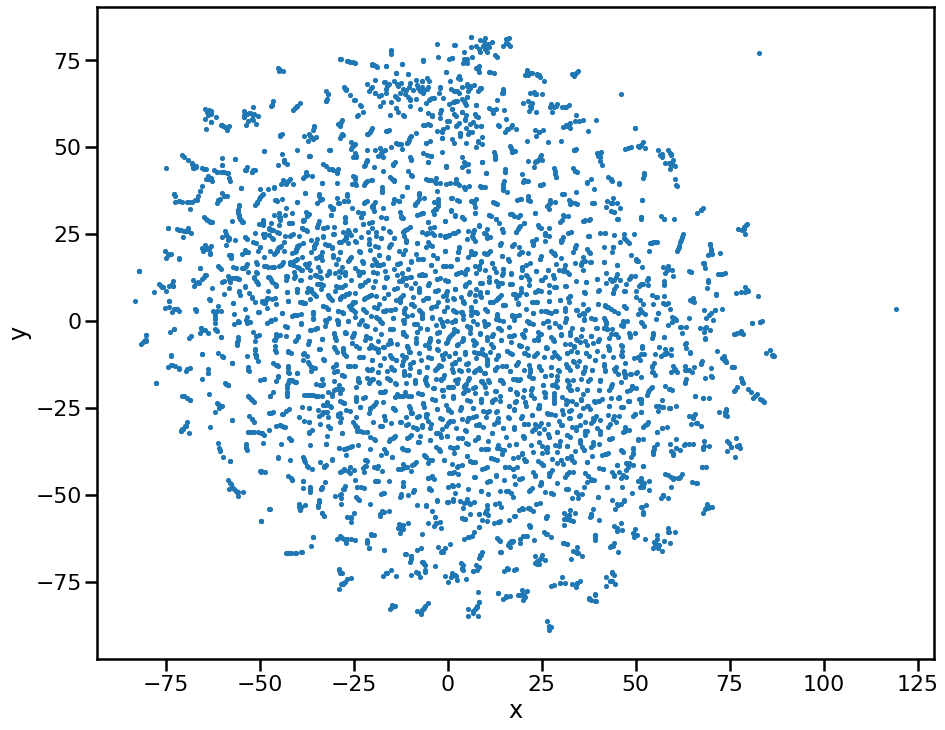

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gera plotagem de todas palavras no espaço 2D
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(15, 12))

In [68]:
# Função para plotar região mais proxima e palavras
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


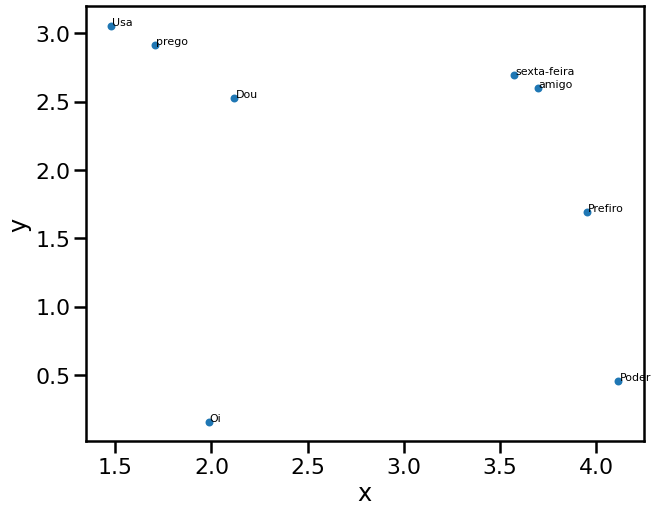

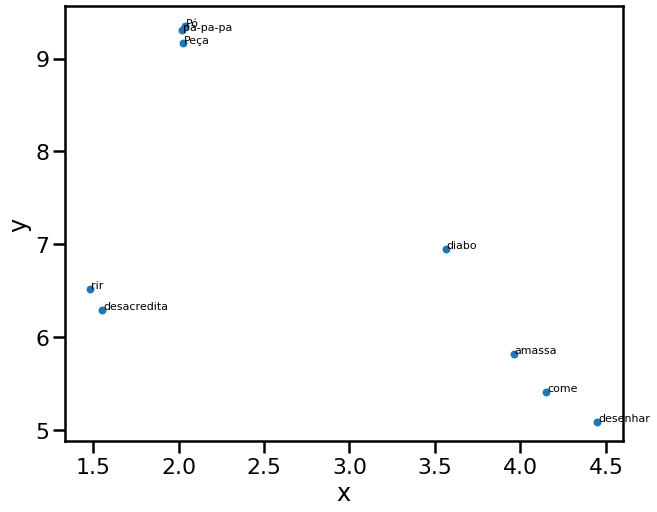

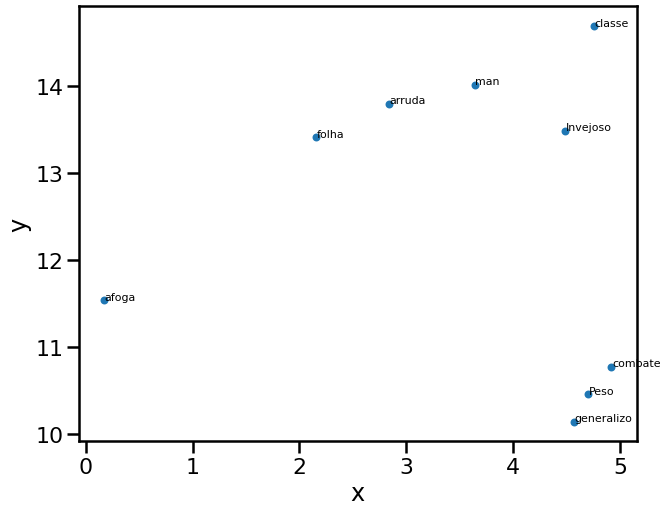

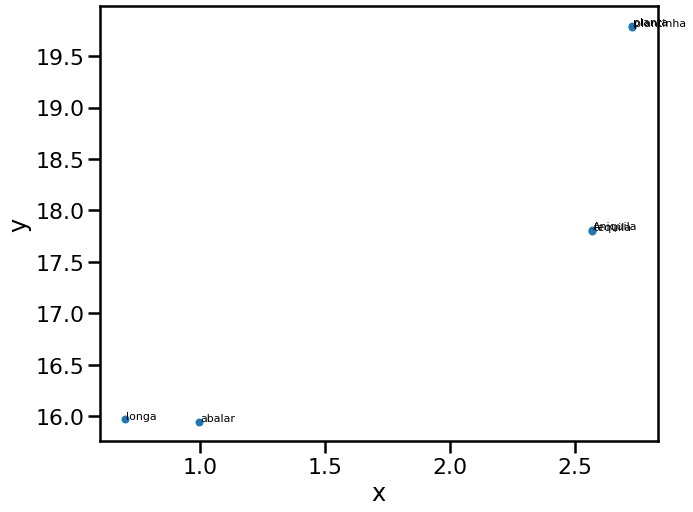

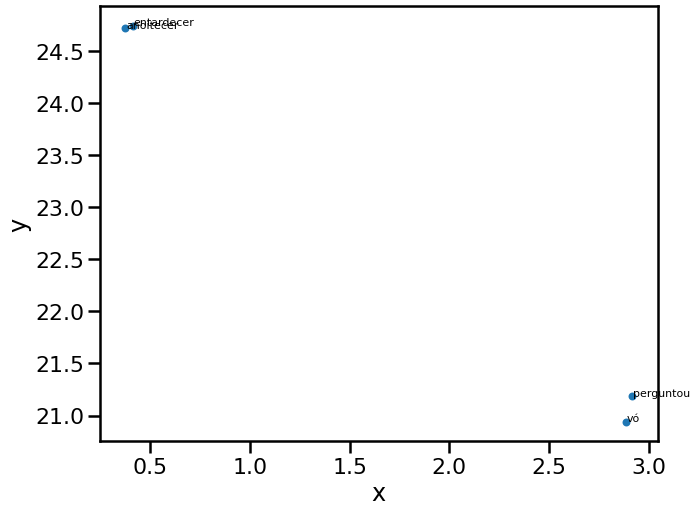

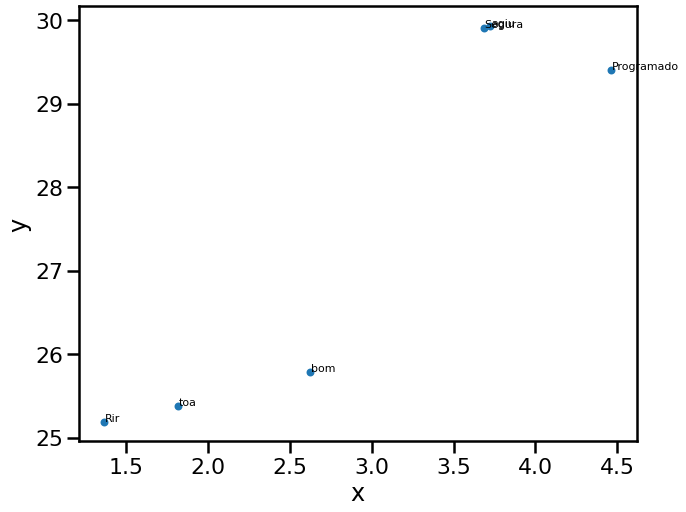

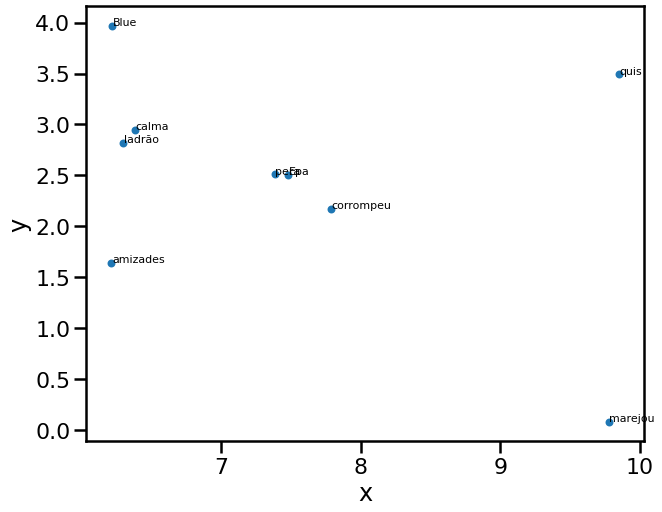

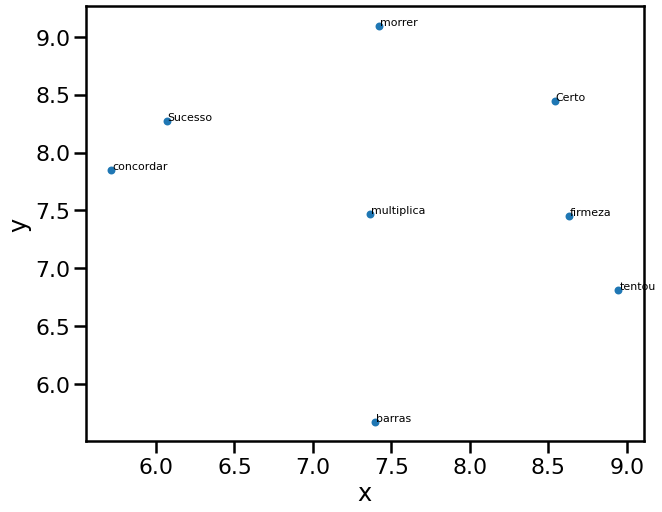

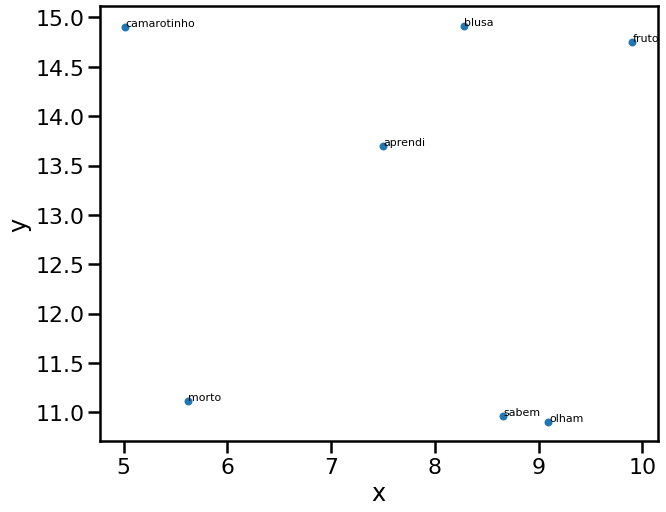

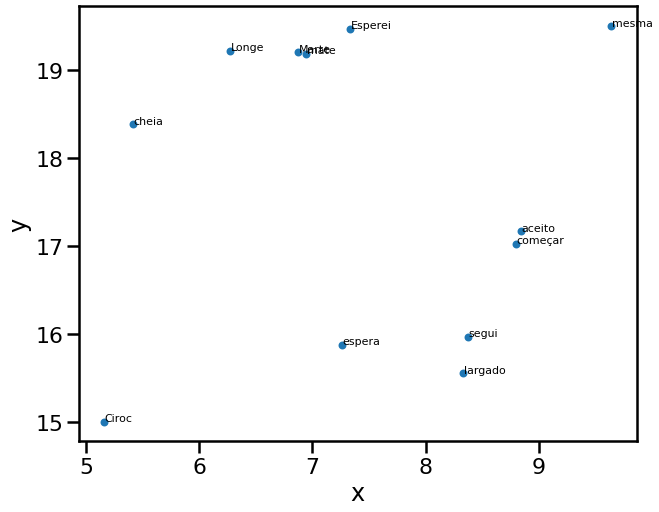

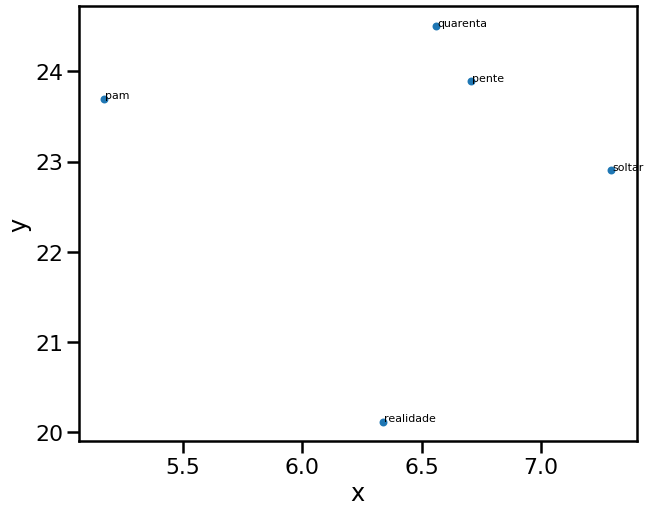

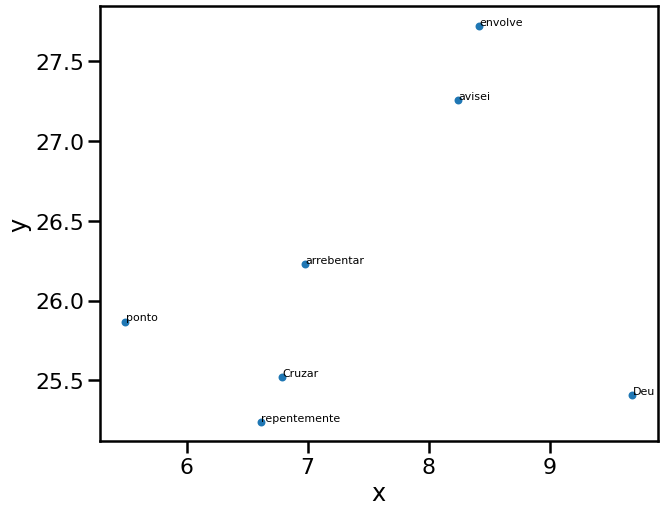

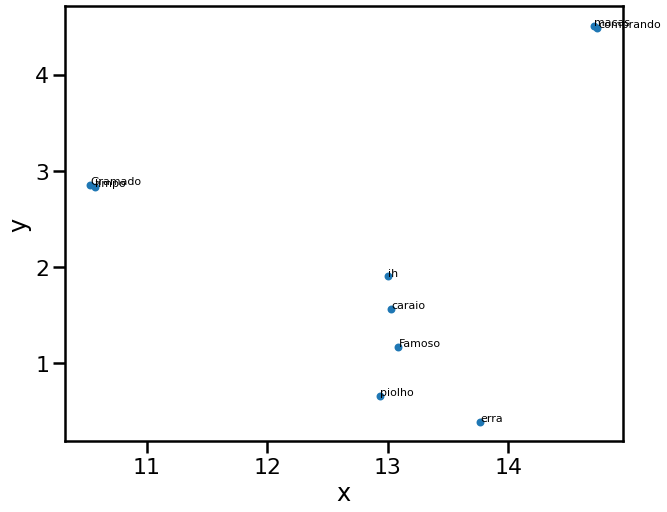

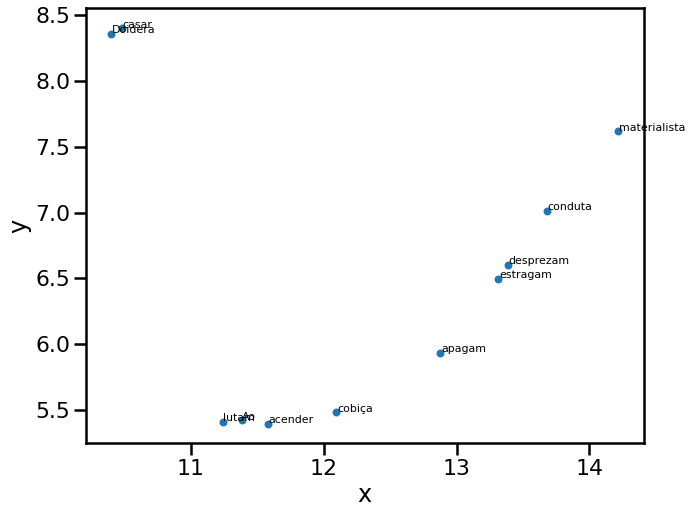

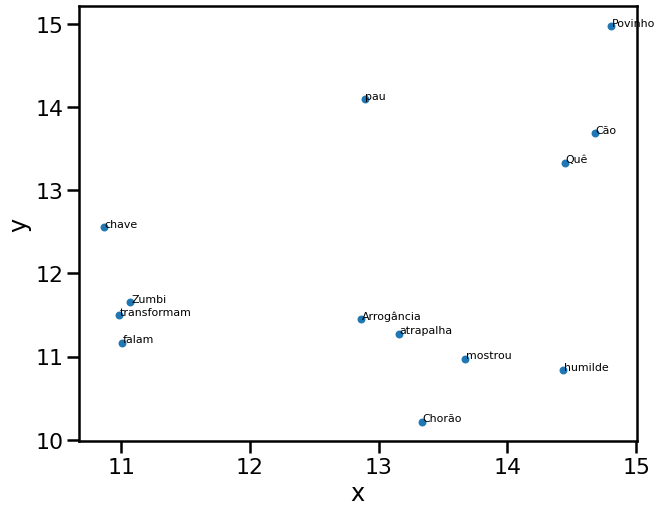

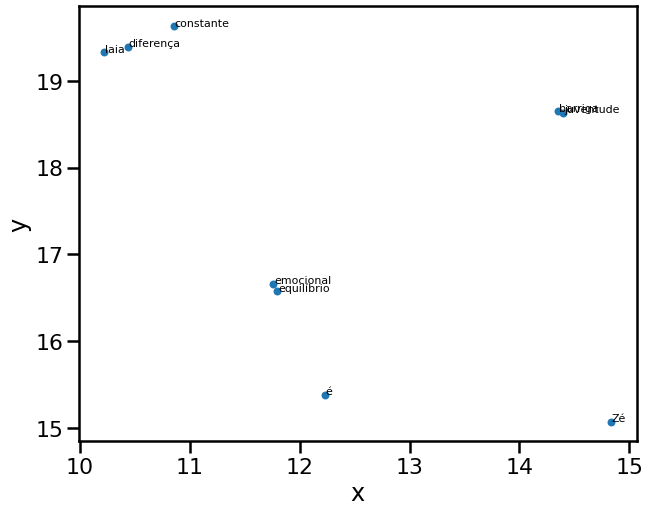

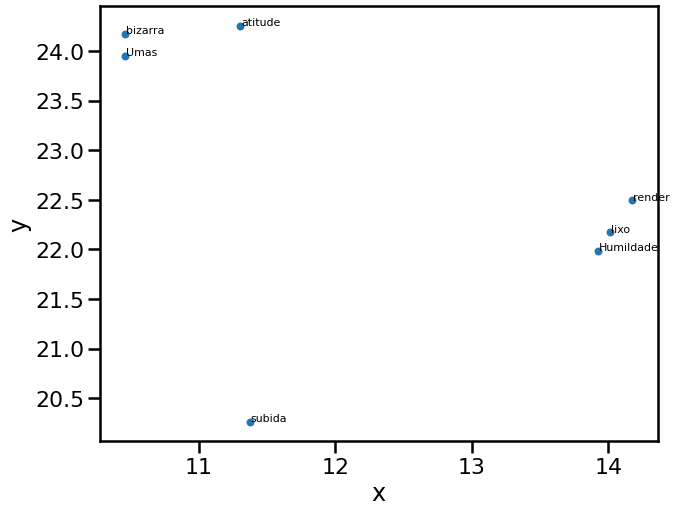

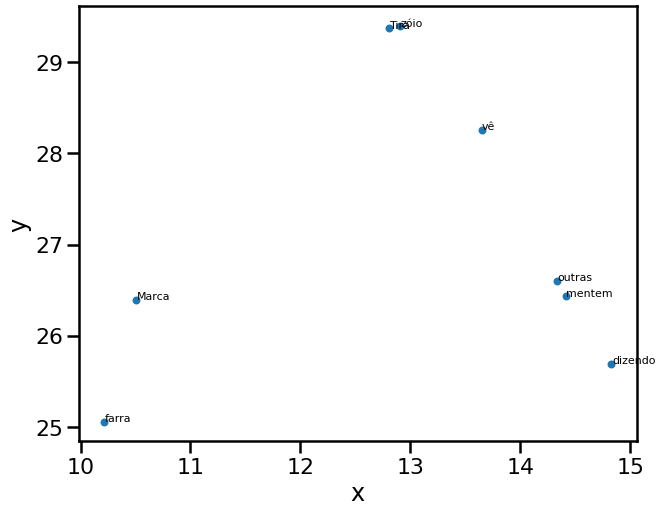

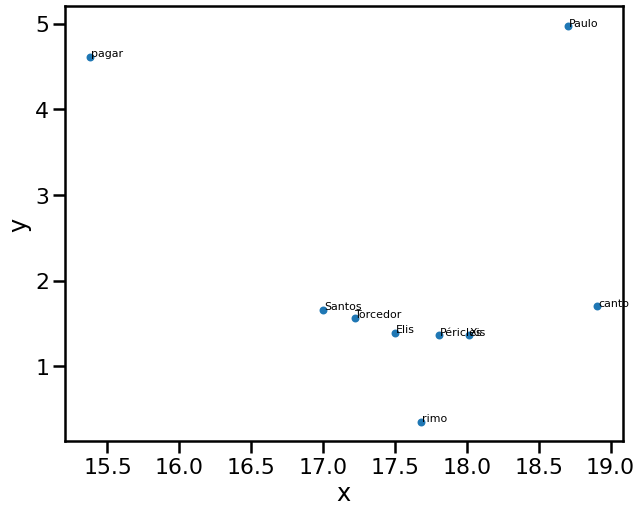

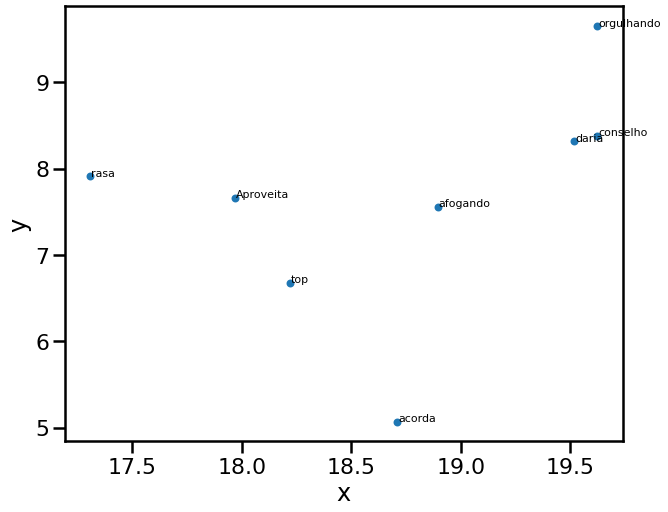

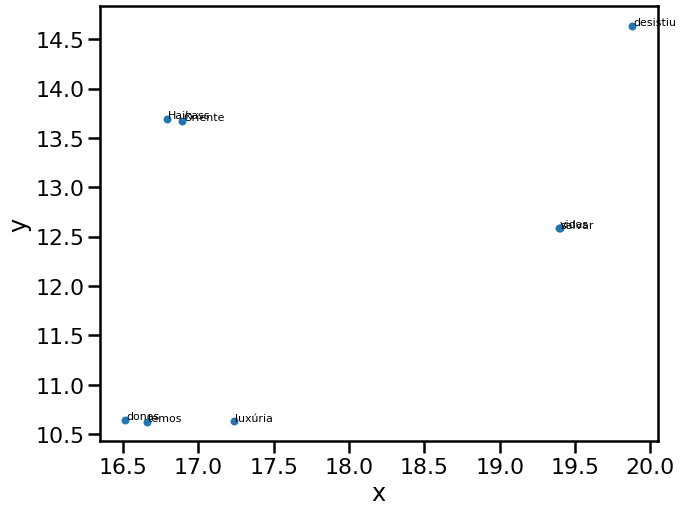

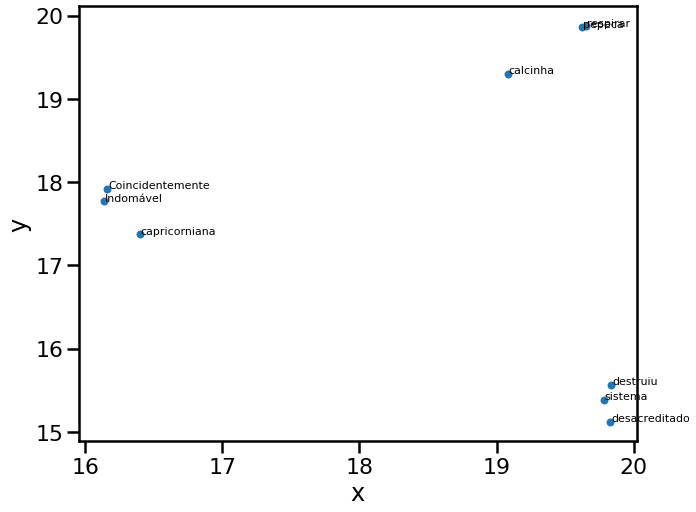

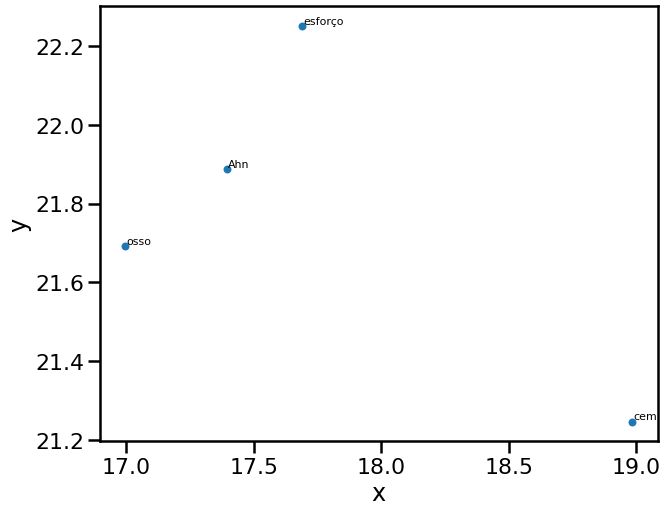

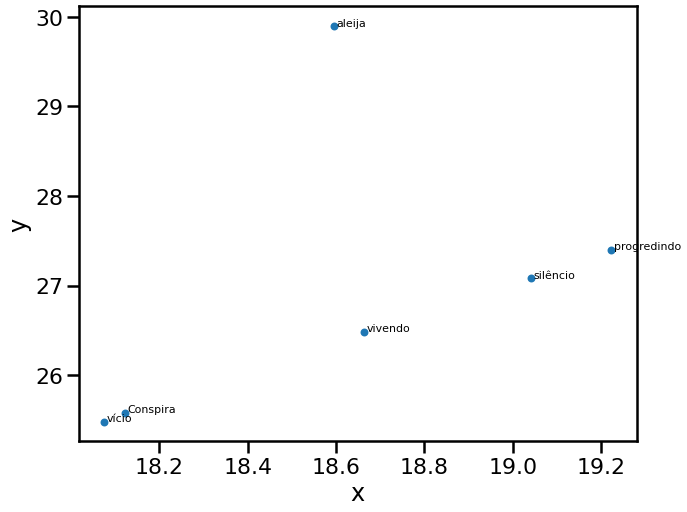

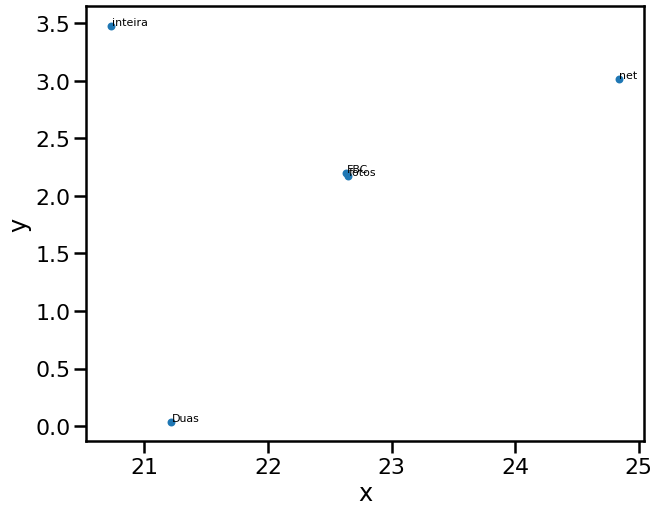

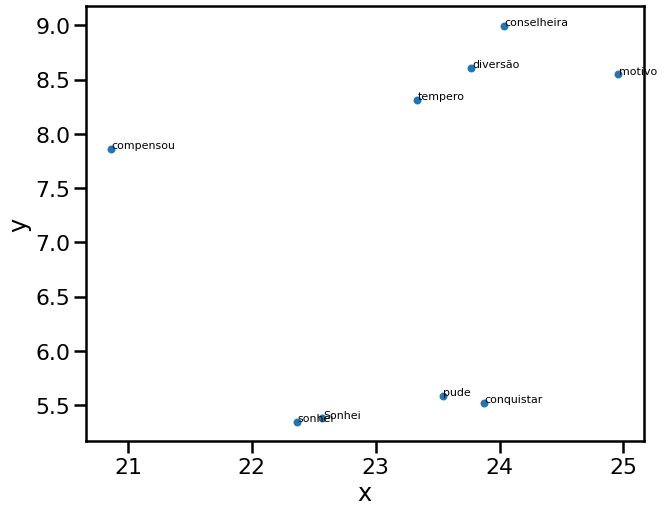

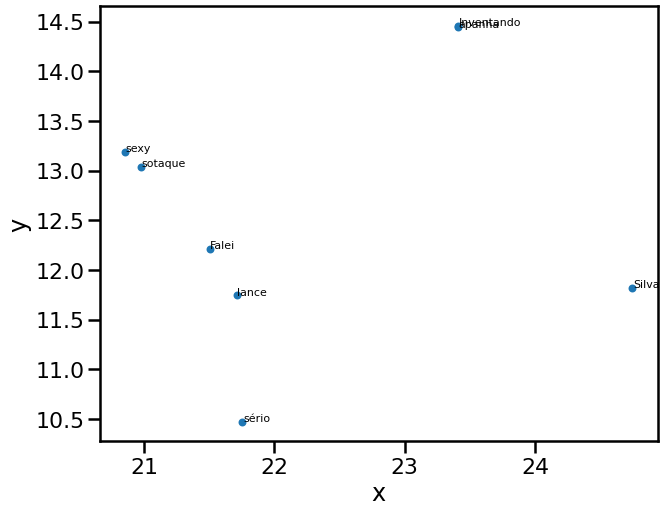

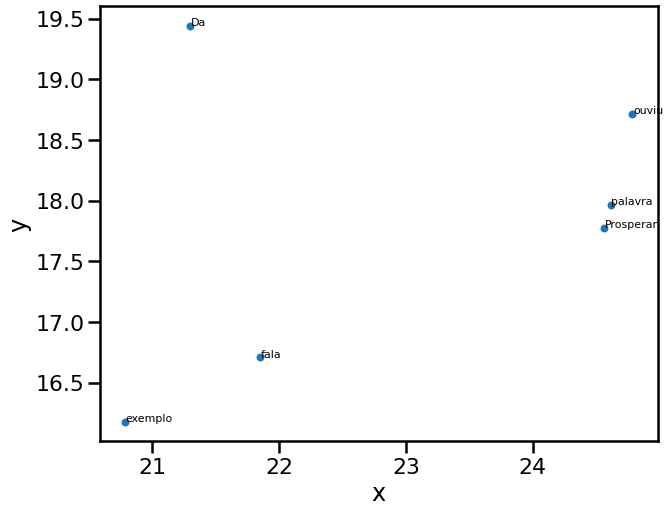

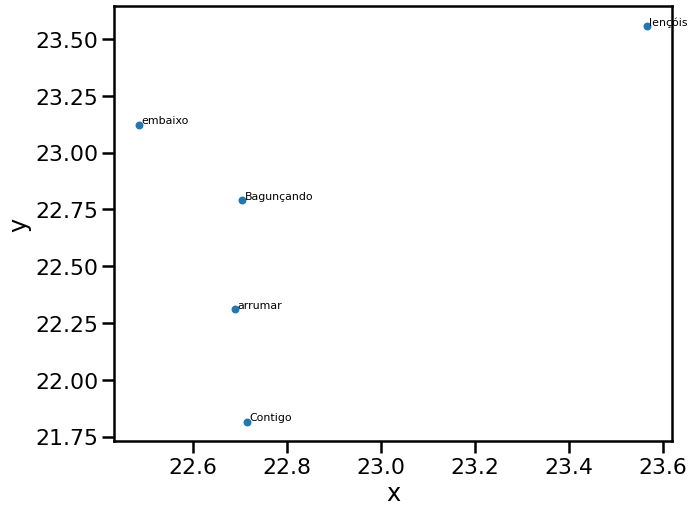

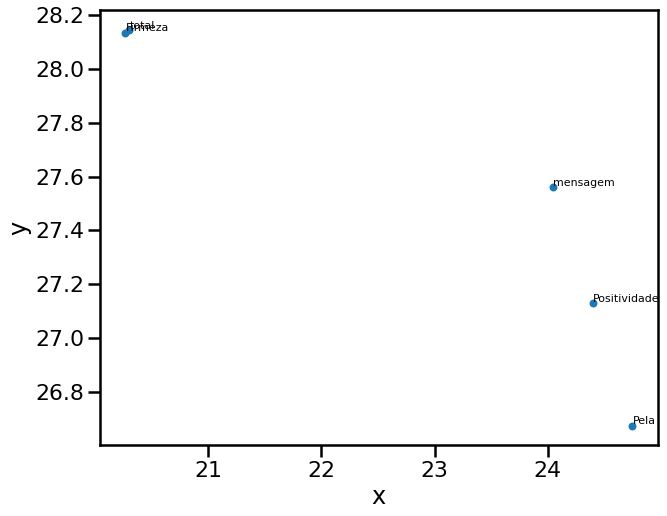

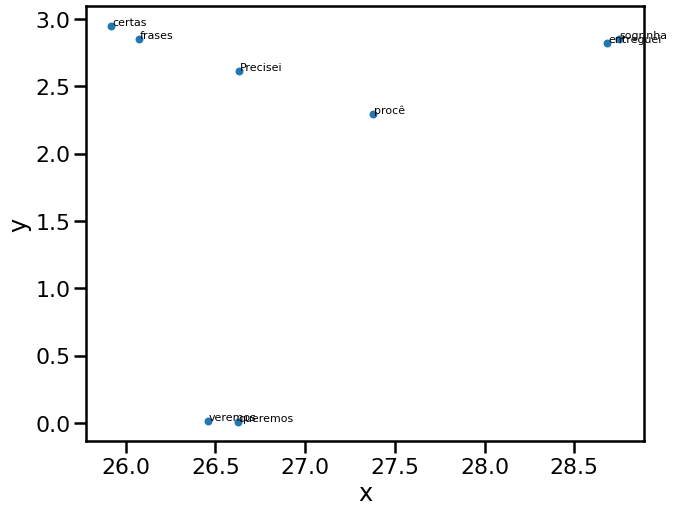

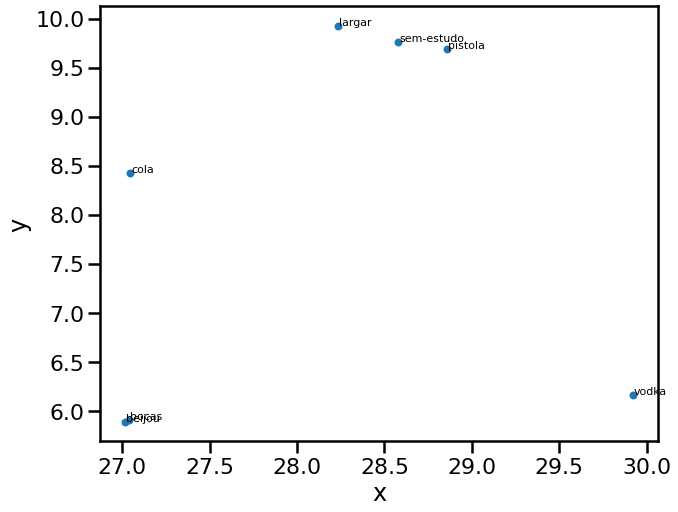

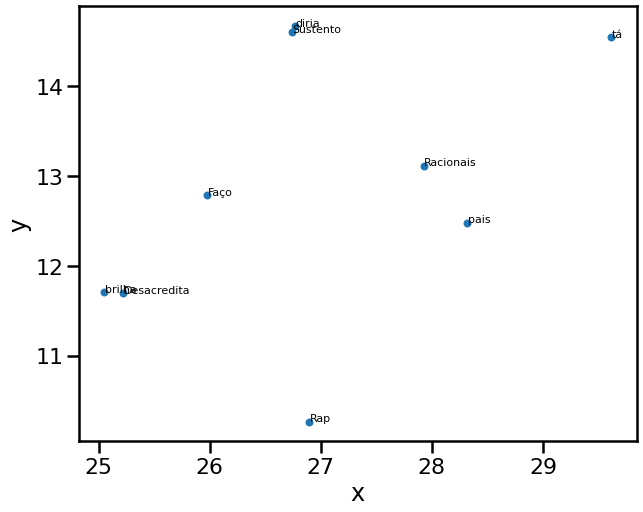

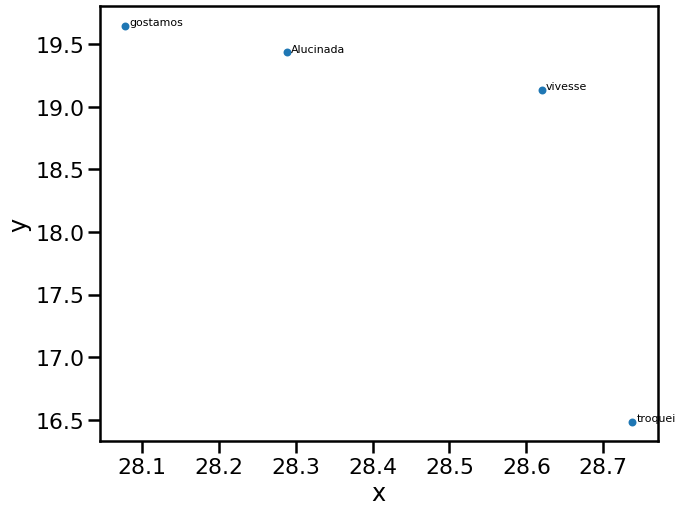

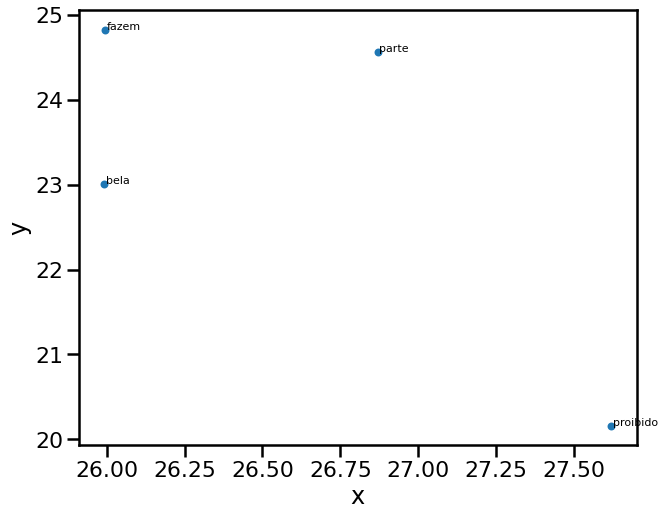

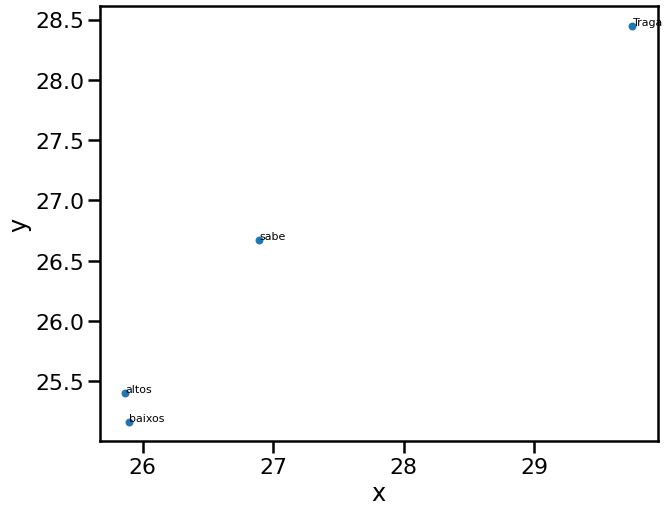

In [69]:
# Seleciona alguns trechos para plot aproximado
for x in range(0, 30, 5): # Move eixo x de 5 em 5 posições (de 0 até 30)
  for y in range(0, 30, 5): # Move eixo y de 5 em 5 posições (de 0 até 30)
    plot_region(x_bounds=(x, x+5), y_bounds=(y, y+5))

In [74]:
# Palavras mais similares a amor
letras2vec.most_similar("amor")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('quenga', 0.577663779258728),
 ('prenda', 0.5559918284416199),
 ('Faça', 0.5379242897033691),
 ('caramelo', 0.5293225646018982),
 ('pretensão', 0.5292601585388184),
 ('doeu', 0.5282407402992249),
 ('espero', 0.5263626575469971),
 ('une', 0.5233256816864014),
 ('forçada', 0.5178850293159485),
 ('fio', 0.5151557922363281)]

In [75]:
# Palavras mais similares a beber
letras2vec.most_similar("beber")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('homenagem', 0.8108768463134766),
 ('gelada', 0.7854423522949219),
 ('conselheira', 0.7585275173187256),
 ('faveladão', 0.7245365977287292),
 ('estraguei', 0.7111776471138),
 ('moderação', 0.7094703912734985),
 ('legenda', 0.7090268731117249),
 ('companhia', 0.7080620527267456),
 ('pessoa', 0.7022191286087036),
 ('cerveja', 0.7003382444381714)]